# 30 – Mobile Sensing & Mental Health: Data & EDA

In this notebook we:

1. Load a synthetic mobile sensing dataset that simulates:
   - Mobility (steps, distance, locations)
   - Social interaction (calls/texts)
   - Sleep and phone usage patterns
2. Explore its relationship to a weekly `depression_score` and `high_risk` label.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = os.path.dirname(os.path.dirname(os.getcwd())) if 'Speech_12052025' in os.getcwd() else "/mnt/data/cardiff_ai_talk_runbook"
data_path = os.path.join(base_dir, "data", "raw", "mental_health_mobile_sensing_synthetic.csv")
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()

Shape: (800, 14)


,user_id,year,week_of_year,avg_daily_steps,avg_daily_distance_km,time_at_home_hours,num_unique_locations,calls_per_day,texts_per_day,avg_sleep_duration_hours,sleep_onset_variability_hours,screen_time_hours,depression_score,high_risk
0,user_004,2018,52,8568.847385,7.154325,8.992305,6,3,10,5.754233,0.457907,4.222673,3.241995,0
1,user_033,2021,9,4388.352071,5.355979,16.079986,14,5,8,6.151467,0.177340,3.274648,5.824010,0
2,user_047,2019,30,6739.200078,8.463517,17.944804,6,3,15,7.424778,0.289639,4.587658,8.885680,0
3,user_014,2022,8,5354.911853,1.624590,17.232629,3,10,15,4.085065,0.241732,4.628158,10.012598,0
4,user_019,2023,40,11051.881508,5.847292,14.097243,4,4,10,8.970903,1.315501,4.892561,0.000000,0


In [2]:
# Basic statistics
df.describe()

,year,week_of_year,avg_daily_steps,avg_daily_distance_km,time_at_home_hours,num_unique_locations,calls_per_day,texts_per_day,avg_sleep_duration_hours,sleep_onset_variability_hours,screen_time_hours,depression_score,high_risk
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.0
mean,2020.420000,25.958750,7999.656954,4.944501,12.237608,7.176250,4.108750,10.24625,7.021364,0.979776,4.438683,4.997294,0.0
std,1.717494,15.324836,2575.941036,1.947225,3.042774,4.090979,2.063916,3.14093,1.198944,0.955866,1.485687,2.724713,0.0
min,2018.000000,1.000000,500.000000,0.500000,4.000000,1.000000,0.000000,2.00000,3.506140,0.001448,0.500000,0.000000,0.0
25%,2019.000000,13.000000,6365.554866,3.653653,10.128422,3.000000,3.000000,8.00000,6.199655,0.296998,3.416886,3.044178,0.0
50%,2020.000000,26.000000,7951.842438,4.969279,12.335290,7.000000,4.000000,10.00000,7.007400,0.698003,4.427172,5.031763,0.0
75%,2022.000000,40.000000,9785.014296,6.286185,14.325293,11.000000,5.000000,12.00000,7.832848,1.307566,5.469417,6.996271,0.0
max,2023.000000,52.000000,15758.461014,10.852315,20.649634,14.000000,11.000000,21.00000,11.000000,6.000000,8.019602,12.763604,0.0


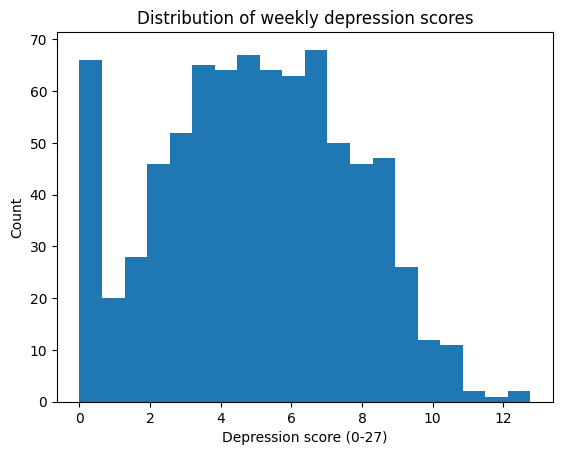

In [3]:
# Distribution of depression scores
plt.hist(df["depression_score"], bins=20)
plt.xlabel("Depression score (0-27)")
plt.ylabel("Count")
plt.title("Distribution of weekly depression scores")
plt.show()

high_risk
0    1.0
Name: proportion, dtype: float64


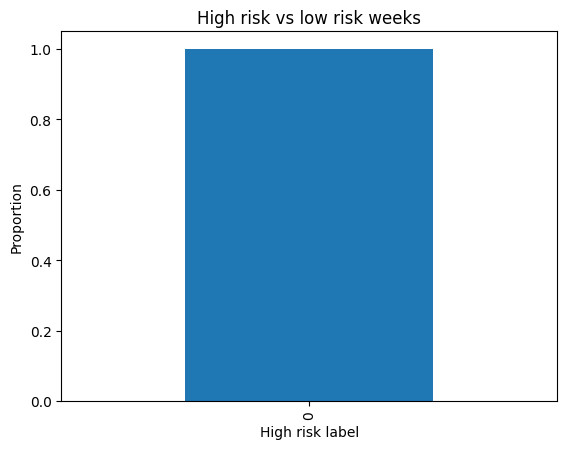

In [4]:
# High risk proportion
high_risk_counts = df["high_risk"].value_counts(normalize=True)
print(high_risk_counts)

high_risk_counts.plot(kind="bar")
plt.title("High risk vs low risk weeks")
plt.xlabel("High risk label")
plt.ylabel("Proportion")
plt.show()

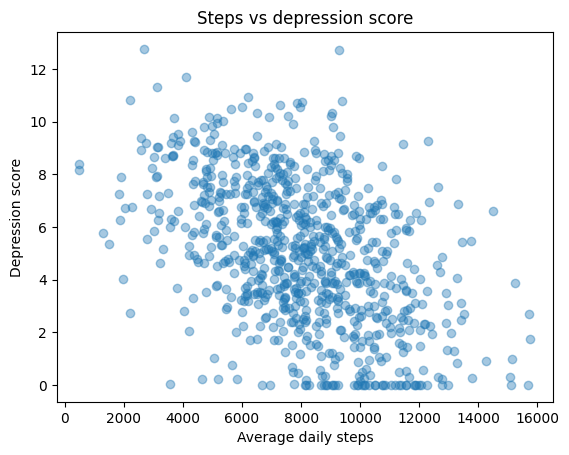

In [5]:
# Relationship between average daily steps and depression score
plt.scatter(df["avg_daily_steps"], df["depression_score"], alpha=0.4)
plt.xlabel("Average daily steps")
plt.ylabel("Depression score")
plt.title("Steps vs depression score")
plt.show()